In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

In [93]:
df = pd.read_csv('../65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [94]:

# Players to be selected
li = ["Barisal","Bhola","Chandpur","Chuadanga","Dhaka","Faridpur","Ishurdi","Jessore","Khepupara","Khulna","Madaripur","Mongla","Patuakhali","Rajshahi","Tangail"]
 
df_new=df[df.Station_Names.isin(li)]
df_new

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1953.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,20671,Tangail,2009,12,29.2,12.6,0.0,83.0,1.700000,0.7,4.000000,41909,491982.91,683166.0,24.15,89.55,10,2009.12
20672,20672,Tangail,2010,12,29.7,13.0,62.0,80.0,1.800000,1.3,6.200000,41909,491982.91,683166.0,24.15,89.55,10,2010.12
20673,20673,Tangail,2011,12,31.0,13.5,0.0,84.0,1.800000,2.3,4.700000,41909,491982.91,683166.0,24.15,89.55,10,2011.12
20674,20674,Tangail,2012,12,27.6,12.9,1.0,86.0,1.900000,1.6,3.700000,41909,491982.91,683166.0,24.15,89.55,10,2012.12


In [95]:
df_new=df_new.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
0,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1949.01
1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,536809.8,510151.9,22.7,90.36,1950.01
2,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1951.01
3,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,536809.8,510151.9,22.7,90.36,1952.01
4,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,536809.8,510151.9,22.7,90.36,1953.01


In [96]:
z = df_new["Wind_Speed"]

df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR","Bright_Sunshine"], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,LATITUDE,LONGITUDE,Period,Wind_Speed
0,29.4,12.3,0.0,68.0,0.6,22.7,90.36,1949.01,0.453704
1,30.0,14.1,0.0,77.0,0.8,22.7,90.36,1950.01,0.453704
2,28.2,12.3,0.0,77.0,0.6,22.7,90.36,1951.01,0.453704
3,26.6,12.3,2.0,77.0,1.0,22.7,90.36,1952.01,0.453704
4,30.0,13.3,10.0,75.0,1.6,22.7,90.36,1953.01,0.453704


In [97]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [98]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [99]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [100]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(trainX, trainY) 

RandomForestRegressor(random_state=0)

In [101]:
Y_pred = regressor.predict(testX) 

In [102]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': Y_pred})
df_temp.head()

,Actual,Predicted
14620,1.4,1.949000
5798,1.7,1.456333
9899,2.7,2.881593
8941,1.3,0.724000
9429,1.8,0.914556


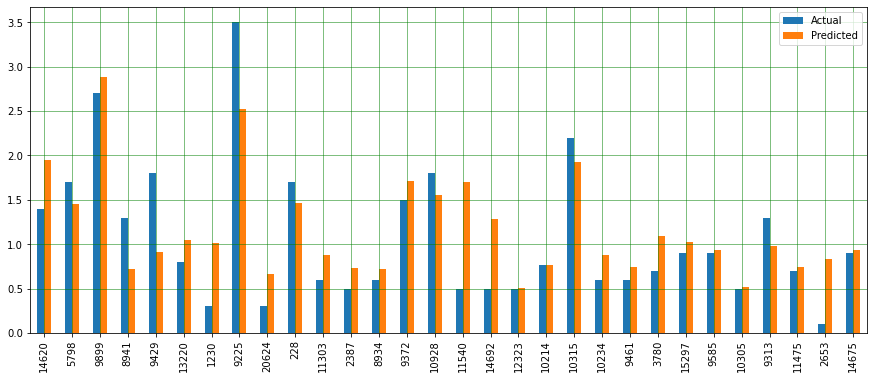

In [103]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [104]:
from sklearn.metrics import r2_score
score= r2_score(testY,Y_pred)
score

0.7021627750505732

In [105]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, Y_pred)))

Mean Absolute Error: 0.3497321086404862
Mean Squared Error: 0.293153662559865
Root Mean Squared Error: 0.5414366653264858
